## 퍼셉트론

다수의 신호를 입력으로 받아 하나의 신호를 출력한다
흐른다(1), 안 흐른다(0)의 두 가지 값을 가질 수 있음

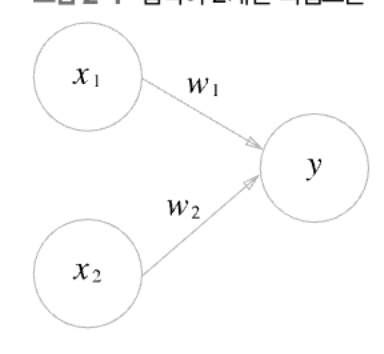

위 그림은 입력으로 2개의 신호를 받은 퍼셉트론이다.
- x1, x2 -> 입력 신호
- y -> 출력 신호
- w1, w2 -> 가중치

### 동작원리
1. 입력 신호가 뉴런에 보내질 때는 각각 고유한 가중치가 곱해진다.
2. 뉴런에서 보내온 신호의 총합이 정해진 한계를 넘어설 때만 1을 출력(이를 '뉴런이 활성화한다'라고 표현하기도 함)

이상을 수식으로 나타내면 아래와 같은 식이 나온다.

$$
y = 
\begin{cases} 
0 & \text{} (w_1 x_1 + w_2 x_2 \leq \theta) \\
1 & \text{} (w_1 x_1 + w_2 x_2 > \theta)
\end{cases}
$$


## 퍼셉트론 구현하기

In [1]:
def AND(x1, x2):
    w1, w2, theta = 0.5, 0.5, 0.7
    tmp = x1*w1 + x2*w2
    if tmp <= theta:
        return 0
    elif tmp > theta:
        return 1

In [2]:
print(AND(0, 0))
print(AND(1, 0))
print(AND(0, 1))
print(AND(1, 1))

0
0
0
1


### 가중치와 편향 도입
- b : 편향
- w1, w2 : 가중치

작동 과정
1. 입력 신호에 가중치를 곱한 값과 편향을 합한다
2. 해당 결과 값이 0을 넘으면 1을 출력하고 그렇지 않으면 0을 출력
$$
y = 
\begin{cases} 
0 & \text{} (b + w_1 x_1 + w_2 x_2 \leq \theta) \\
1 & \text{} (b + w_1 x_1 + w_2 x_2 > \theta)
\end{cases}
$$


In [4]:
import numpy as np

x = np.array([0, 1])
w = np.array([0.5, 0.5])

# 편향
b = -0.7

print(w*x)

print(np.sum(w*x))

print(np.sum(w*x) + b)

[0.  0.5]
0.5
-0.19999999999999996


### 가중치와 편향 구현하기

In [6]:
# AND 게이트
def AND(x1, x2):
    x = np.array([x1, x2])
    w = np.array([0.5, 0.5]) # 가중치
    b = -0.7 # 편향
    tmp = np.sum(x*w) + b   # (입력 신호 * 가중치) + 편향
    if tmp <= 0:
        return 0
    else:
        return 1

In [9]:
# NAND 게이트
def NAND(x1, x2):
    x = np.array([x1, x2])
    w = np.array([-0.5, -0.5])  # AND와는 가중치(w, b)만 다르다
    b = 0.7
    tmp = np.sum(x*w) + b
    if tmp <= 0:
        return 0
    else:
        return 1

In [10]:
# OR 게이트
def OR(x1, x2):
    x = np.array([x1, x2])
    w = np.array([0.5, 0.5])    # AND와는 가중치(w, b)만 다르다
    b = -0.2
    tmp = np.sum(x*w) + b
    if tmp <= 0:
        return 0
    else:
        return 1

### XOR 게이트
XOR을 그래프로 그려보면 선형적으로 그려지기에 이를 비선형으로 바꿔야한다.

따라서 NAND, OR, AND를 섞어 다층 퍼셉트론으로 구성된다.

--- XOR 퍼셉트론 구조 ---

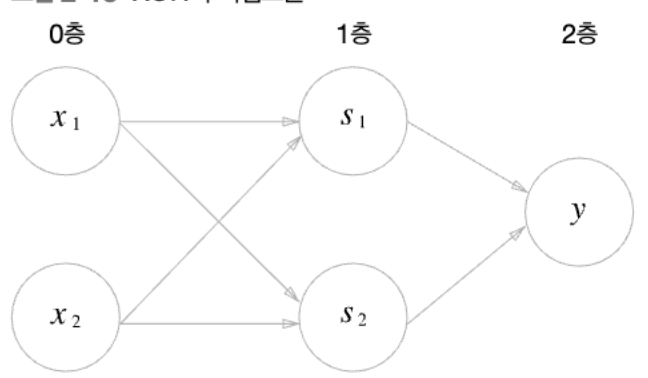

In [13]:
# XOR 게이트
def XOR(x1, x2):
    s1 = NAND(x1, x2)
    s2 = OR(x1, x2)
    y = AND(s1, s2)
    return y

print(XOR(0, 0))
print(XOR(0, 1))
print(XOR(1, 0))
print(XOR(1, 1))

0
1
1
0
